## Open Exploration

Explanation to what we did + table of contents

### Import Libraries

In [1]:
# General libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy

# Import problem formulation
from problem_formulation import get_model_for_problem_formulation

# EMA workbench imports
from ema_workbench import (Model, Policy, MultiprocessingEvaluator, ScalarOutcome, RealParameter, 
                           IntegerParameter, CategoricalParameter, optimize, Scenario, 
                           Constant, SequentialEvaluator)
#from ema_workbench.em_framework.evaluators import perform_experiments,LHS, SOBOL, MORRIS, SequentialEvaluator, BaseEvaluator
from ema_workbench.em_framework.samplers import sample_uncertainties, sample_levers
from ema_workbench.util import ema_logging, save_results, load_results

ema_logging.log_to_stderr(ema_logging.INFO)

<Logger EMA (DEBUG)>

## Worst Case Scenario 

In [2]:
# define the problem formulation between 0 and 9
# Problem formulation 6 is specific to Dike Ring 3
dike_model, planning_steps = get_model_for_problem_formulation(6)

In [3]:
# Set uncertainties and levers variables
uncertainties = copy.deepcopy(dike_model.uncertainties)
levers = copy.deepcopy(dike_model.levers)

In [4]:
# function to fill empty policy 
def get_do_nothing_dict():
    return {l.name: 0 for l in dike_model.levers}

In [5]:
# Create a reference policy where no action is taken
null_policy = [Policy('null_policy', **dict(get_do_nothing_dict()))]

In [6]:
'''# Create a reference policy where no action is taken
# Create a reference policy where no action is taken
policies = [Policy('null_policy', **{'0_RfR 0':0,'0_RfR 1':0,'0_RfR 2':0,
                                  '1_RfR 0':0,'1_RfR 1':0,'1_RfR 2':0,
                                  '2_RfR 0':0,'2_RfR 1':0,'2_RfR 2':0,
                                  '3_RfR 0':0,'3_RfR 1':0,'3_RfR 2':0,
                                  '4_RfR 0':0,'4_RfR 1':0,'4_RfR 2':0,
                                  'A.1_DikeIncrease 0':0,
                                  'A.2_DikeIncrease 0':0,
                                  'A.3_DikeIncrease 0':0,
                                  'A.4_DikeIncrease 0':0,
                                  'A.5_DikeIncrease 0':0,
                                  'A.1_DikeIncrease 1':0,
                                  'A.2_DikeIncrease 1':0,
                                  'A.3_DikeIncrease 1':0,
                                  'A.4_DikeIncrease 1':0,
                                  'A.5_DikeIncrease 1':0,
                                  'A.1_DikeIncrease 2':0,
                                  'A.2_DikeIncrease 2':0,
                                  'A.3_DikeIncrease 2':0,
                                  'A.4_DikeIncrease 2':0,
                                  'A.5_DikeIncrease 2':0,
                                  'EWS_DaysToThreat':0})
                                  ]'''

"# Create a reference policy where no action is taken\n# Create a reference policy where no action is taken\npolicies = [Policy('null_policy', **{'0_RfR 0':0,'0_RfR 1':0,'0_RfR 2':0,\n                                  '1_RfR 0':0,'1_RfR 1':0,'1_RfR 2':0,\n                                  '2_RfR 0':0,'2_RfR 1':0,'2_RfR 2':0,\n                                  '3_RfR 0':0,'3_RfR 1':0,'3_RfR 2':0,\n                                  '4_RfR 0':0,'4_RfR 1':0,'4_RfR 2':0,\n                                  'A.1_DikeIncrease 0':0,\n                                  'A.2_DikeIncrease 0':0,\n                                  'A.3_DikeIncrease 0':0,\n                                  'A.4_DikeIncrease 0':0,\n                                  'A.5_DikeIncrease 0':0,\n                                  'A.1_DikeIncrease 1':0,\n                                  'A.2_DikeIncrease 1':0,\n                                  'A.3_DikeIncrease 1':0,\n                                  'A.4_DikeIncrease 1':0

In [7]:
n_scenarios = 100

ema_logging.log_to_stderr(ema_logging.INFO)
 
with MultiprocessingEvaluator(dike_model) as evaluator:
    experiments, outcomes = evaluator.perform_experiments(scenarios=n_scenarios, policies=null_policy)

[MainProcess/INFO] pool started with 8 workers
[MainProcess/INFO] performing 100 scenarios * 1 policies * 1 model(s) = 100 experiments
100%|████████████████████████████████████████| 100/100 [00:14<00:00,  7.04it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [8]:
#Save the results
save_results([experiments, outcomes], 'results/10000Scenarios_NullPolicy_PF6.tar.gz')
# load the worst case results for further analysis 
experiments, outcomes = load_results('results/10000Scenarios_NullPolicy_PF6.tar.gz')

[MainProcess/INFO] results saved successfully to /Users/philipmuller/Documents/GitHub/model-based-decision-making/final assignment/results/10000Scenarios_NullPolicy_PF6.tar.gz
[MainProcess/INFO] results loaded successfully from /Users/philipmuller/Documents/GitHub/model-based-decision-making/final assignment/results/10000Scenarios_NullPolicy_PF6.tar.gz


## Here actual Open exploration shit


### show that random policy is better than no policy

In [9]:
# get the value ranges for policies 
for policy in dike_model.levers:
    print(repr(policy))

IntegerParameter('0_RfR 0', 0, 1, resolution=None, default=None, variable_name=['0_RfR 0'], pff=False)
IntegerParameter('0_RfR 1', 0, 1, resolution=None, default=None, variable_name=['0_RfR 1'], pff=False)
IntegerParameter('0_RfR 2', 0, 1, resolution=None, default=None, variable_name=['0_RfR 2'], pff=False)
IntegerParameter('1_RfR 0', 0, 1, resolution=None, default=None, variable_name=['1_RfR 0'], pff=False)
IntegerParameter('1_RfR 1', 0, 1, resolution=None, default=None, variable_name=['1_RfR 1'], pff=False)
IntegerParameter('1_RfR 2', 0, 1, resolution=None, default=None, variable_name=['1_RfR 2'], pff=False)
IntegerParameter('2_RfR 0', 0, 1, resolution=None, default=None, variable_name=['2_RfR 0'], pff=False)
IntegerParameter('2_RfR 1', 0, 1, resolution=None, default=None, variable_name=['2_RfR 1'], pff=False)
IntegerParameter('2_RfR 2', 0, 1, resolution=None, default=None, variable_name=['2_RfR 2'], pff=False)
IntegerParameter('3_RfR 0', 0, 1, resolution=None, default=None, variable

In [10]:
# Create a policy where action is taken randomly
# compare the performance of that policy to the previously computed null_policy
import random # for randomly deciding to switch policy on/ off

random_policies = [Policy('alpha_random_policy', **{'3_RfR 0':random.randint(0,1),
                                  '3_RfR 1':random.randint(0,1),
                                  '3_RfR 2':random.randint(0,1),
                                  'A.1_DikeIncrease 0':random.randint(0,10),
                                  'A.2_DikeIncrease 0':random.randint(0,10),
                                  'A.3_DikeIncrease 0':random.randint(0,10),
                                  'A.4_DikeIncrease 0':random.randint(0,10),
                                  'A.5_DikeIncrease 0':random.randint(0,10),
                                  'A.1_DikeIncrease 1':random.randint(0,10),
                                  'A.2_DikeIncrease 1':random.randint(0,10),
                                  'A.3_DikeIncrease 1':random.randint(0,10),
                                  'A.4_DikeIncrease 1':random.randint(0,10),
                                  'A.5_DikeIncrease 1':random.randint(0,10),
                                  'A.1_DikeIncrease 2':random.randint(0,10),
                                  'A.2_DikeIncrease 2':random.randint(0,10),
                                  'A.3_DikeIncrease 2':random.randint(0,10),
                                  'A.4_DikeIncrease 2':random.randint(0,10),
                                  'A.5_DikeIncrease 2':random.randint(0,10),
                                  'EWS_DaysToThreat':random.randint(0,4)}),
                Policy('beta_random_policy', **{'3_RfR 0':random.randint(0,1),
                                  '3_RfR 1':random.randint(0,1),
                                  '3_RfR 2':random.randint(0,1),
                                  'A.1_DikeIncrease 0':random.randint(0,10),
                                  'A.2_DikeIncrease 0':random.randint(0,10),
                                  'A.3_DikeIncrease 0':random.randint(0,10),
                                  'A.4_DikeIncrease 0':random.randint(0,10),
                                  'A.5_DikeIncrease 0':random.randint(0,10),
                                  'A.1_DikeIncrease 1':random.randint(0,10),
                                  'A.2_DikeIncrease 1':random.randint(0,10),
                                  'A.3_DikeIncrease 1':random.randint(0,10),
                                  'A.4_DikeIncrease 1':random.randint(0,10),
                                  'A.5_DikeIncrease 1':random.randint(0,10),
                                  'A.1_DikeIncrease 2':random.randint(0,10),
                                  'A.2_DikeIncrease 2':random.randint(0,10),
                                  'A.3_DikeIncrease 2':random.randint(0,10),
                                  'A.4_DikeIncrease 2':random.randint(0,10),
                                  'A.5_DikeIncrease 2':random.randint(0,10),
                                  'EWS_DaysToThreat':random.randint(0,4)}),
                Policy('gamma_random_policy', **{'3_RfR 0':random.randint(0,1),
                                  '3_RfR 1':random.randint(0,1),
                                  '3_RfR 2':random.randint(0,1),
                                  'A.1_DikeIncrease 0':random.randint(0,10),
                                  'A.2_DikeIncrease 0':random.randint(0,10),
                                  'A.3_DikeIncrease 0':random.randint(0,10),
                                  'A.4_DikeIncrease 0':random.randint(0,10),
                                  'A.5_DikeIncrease 0':random.randint(0,10),
                                  'A.1_DikeIncrease 1':random.randint(0,10),
                                  'A.2_DikeIncrease 1':random.randint(0,10),
                                  'A.3_DikeIncrease 1':random.randint(0,10),
                                  'A.4_DikeIncrease 1':random.randint(0,10),
                                  'A.5_DikeIncrease 1':random.randint(0,10),
                                  'A.1_DikeIncrease 2':random.randint(0,10),
                                  'A.2_DikeIncrease 2':random.randint(0,10),
                                  'A.3_DikeIncrease 2':random.randint(0,10),
                                  'A.4_DikeIncrease 2':random.randint(0,10),
                                  'A.5_DikeIncrease 2':random.randint(0,10),
                                  'EWS_DaysToThreat':random.randint(0,4)})                  
                                  ]

In [11]:
n_scenarios = 100

ema_logging.log_to_stderr(ema_logging.INFO)
 
with MultiprocessingEvaluator(dike_model) as evaluator:
    random_experiments, random_outcomes = evaluator.perform_experiments(scenarios=n_scenarios, policies=random_policies)

[MainProcess/INFO] pool started with 8 workers
[MainProcess/INFO] performing 100 scenarios * 3 policies * 1 model(s) = 300 experiments
100%|████████████████████████████████████████| 300/300 [00:44<00:00,  6.75it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [12]:
#Save the results
save_results([random_experiments, random_outcomes], 'results/10000Scenarios_RandomPolicy_PF6.tar.gz')
# load the worst case results for further analysis 
random_experiments, random_outcomes = load_results('results/10000Scenarios_RandomPolicy_PF6.tar.gz')

[MainProcess/INFO] results saved successfully to /Users/philipmuller/Documents/GitHub/model-based-decision-making/final assignment/results/10000Scenarios_RandomPolicy_PF6.tar.gz
[MainProcess/INFO] results loaded successfully from /Users/philipmuller/Documents/GitHub/model-based-decision-making/final assignment/results/10000Scenarios_RandomPolicy_PF6.tar.gz


In [13]:
random_outcomes = pd.DataFrame(random_outcomes).drop(columns=['A.1_Dike Investment Costs',
                                                              'A.2_Dike Investment Costs',
                                                              'A.3_Dike Investment Costs',
                                                              'A.4_Dike Investment Costs',
                                                              'A.5_Dike Investment Costs',
                                                              'RfR Total Costs',
                                                              'Expected Evacuation Costs'])

#put outcomes from null_policy into similar format
outcomes = pd.DataFrame(outcomes).drop(columns=['A.1_Dike Investment Costs',
                                                              'A.2_Dike Investment Costs',
                                                              'A.3_Dike Investment Costs',
                                                              'A.4_Dike Investment Costs',
                                                              'A.5_Dike Investment Costs',
                                                              'RfR Total Costs',
                                                              'Expected Evacuation Costs'])

In [15]:
# statistical tests and heatmap of p_values

from scipy.stats import normaltest, mannwhitneyu, ttest_ind


# test for normal distribution. If test fails, use non-parametric test of central tendency 
for col in outcomes.columns: 
    statistic, p_value = normaltest(outcomes[col])
    if p_value >= .05: 
        print(f'normaltest failed for {col} with p={p_value}')
    
for col in random_outcomes.columns:
    statistic, p_value = normaltest(random_outcomes[col])
    if p_value >= 0.05:    
        print(f'normaltest failed for {col} with p={p_value}')

In [26]:
# continue with parametric t-test

p = pd.DataFrame(index=random_outcomes.columns, columns=outcomes.columns)
for col in outcomes.columns:
    for row in random_outcomes.columns:
        statistic, p_value = ttest_ind(outcomes[col],random_outcomes[row])
        p.loc[row,col] = p_value
p = p.astype(float)

<Axes: >

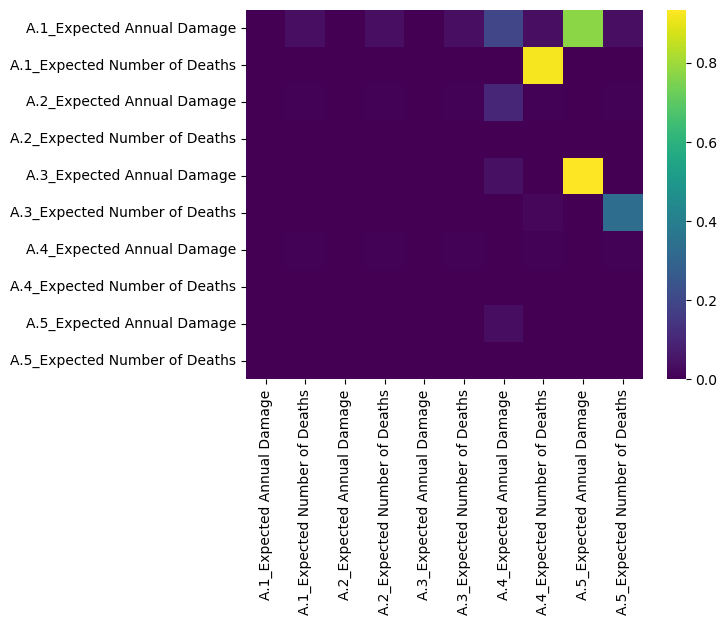

In [29]:
sns.heatmap(p, cmap='viridis')

<Axes: >

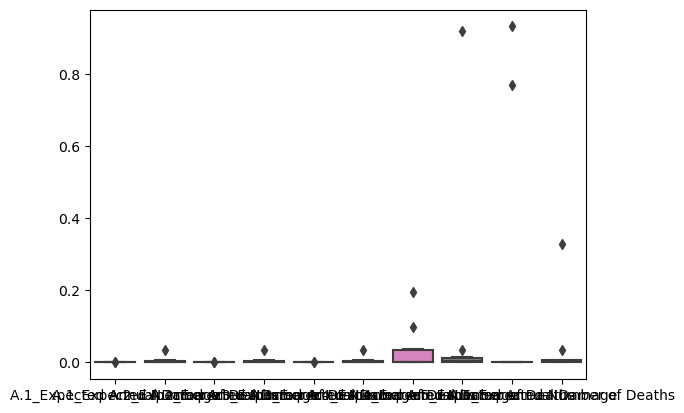

In [30]:
sns.boxplot(p)